<a href="https://colab.research.google.com/github/pratheeth123/ML-LAB/blob/main/Week3/ML_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n = 60

study_hours = np.random.uniform(1, 10, n)
sleep_hours = np.random.uniform(4, 9, n)
attendance = np.random.uniform(60, 100, n)
previous_gpa = np.random.uniform(4.0, 10.0, n)
internet_usage = np.random.uniform(1, 8, n)

exam_score = (
    6 * study_hours +
    2 * sleep_hours +
    0.4 * attendance +
    7 * previous_gpa -
    1.5 * internet_usage +
    np.random.normal(0, 5, n)
)
data = pd.DataFrame({
    "Study_Hours": study_hours,
    "Sleep_Hours": sleep_hours,
    "Attendance": attendance,
    "Previous_GPA": previous_gpa,
    "Internet_Usage": internet_usage,
    "Exam_Score": exam_score
})

data.head()


,Study_Hours,Sleep_Hours,Attendance,Previous_GPA,Internet_Usage,Exam_Score
0,4.370861,5.943386,92.297606,6.046398,7.583210,106.208813
1,9.556429,5.356745,95.843652,4.680841,7.677500,124.381160
2,7.587945,8.143688,72.720139,9.548162,7.404051,157.353880
3,6.387926,5.783767,64.402077,9.264036,3.591111,138.287104
4,2.404168,5.404673,69.117407,5.547650,1.108196,79.926855


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_simple = data[["Study_Hours"]]
y = data["Exam_Score"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

y_pred_s = simple_model.predict(X_test_s)

print("Simple Linear Regression")
print("Intercept:", simple_model.intercept_)
print("Slope:", simple_model.coef_[0])
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R2 Score:", r2_score(y_test_s, y_pred_s))


Simple Linear Regression
Intercept: 82.35054352099779
Slope: 6.698802056061754
MSE: 197.86787117216463
R2 Score: 0.5825026692685071


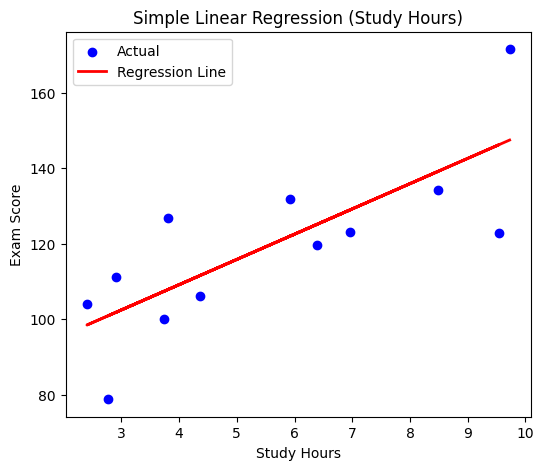

In [22]:
plt.figure(figsize=(6,5))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Simple Linear Regression (Study Hours)")
plt.legend()
plt.show()


In [23]:

X_multi = data.drop("Exam_Score", axis=1)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)


multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)


y_pred_m = multi_model.predict(X_test_m)

print("\nMultiple Linear Regression")
print("Intercept:", multi_model.intercept_)

print("\nCoefficients:")
for feature, coef in zip(X_multi.columns, multi_model.coef_):
    print(f"{feature}: {coef:.2f}")

print("\nMSE:", mean_squared_error(y_test_m, y_pred_m))
print("R2 Score:", r2_score(y_test_m, y_pred_m))



Multiple Linear Regression
Intercept: -21.9402069641376

Coefficients:
Study_Hours: 6.10
Sleep_Hours: 3.24
Attendance: 0.43
Previous_GPA: 8.13
Internet_Usage: -0.93

MSE: 17.017845191222513
R2 Score: 0.9640926801301906


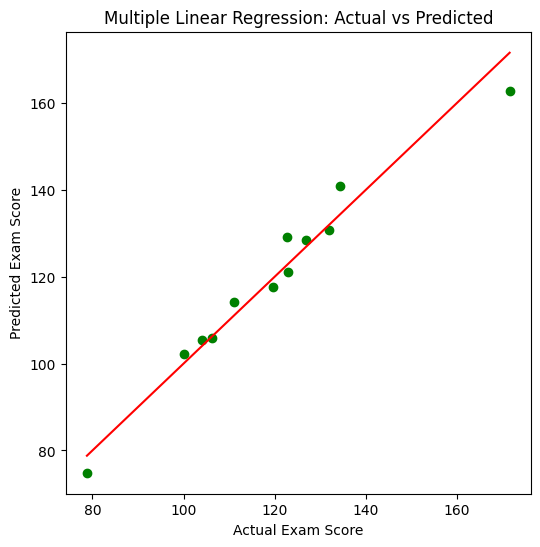

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_m, y_pred_m, color='green')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Multiple Linear Regression: Actual vs Predicted")

plt.plot([y_test_m.min(), y_test_m.max()],
         [y_test_m.min(), y_test_m.max()],
         color='red')

plt.show()
